[[0. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1.]
 [1. 0. 0. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (0, 1)	1.0
  (0, 2)	1.0
  (1, 2)	1.0
  (0, 3)	1.0
  (1, 3)	1.0
  (2, 3)	1.0
  (0, 4)	1.0
  (1, 4)	1.0
  (2, 4)	1.0
  (3, 4)	1.0
  (0, 1)	1.0
  (0, 2)	1.0
  (0, 3)	1.0
  (0, 4)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (2, 1)	1.0
  (3, 0)	1.0
  (3, 1)	1.0
  (3, 2)	1.0
  (4, 0)	1.0
  (4, 1)	1.0
  (4, 2)	1.0
  (4, 3)	1.0
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]] [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
a [[0.58976782]
 [0.14744196]
 [0.29488391]
 [0.44232587]
 [0.58976782]]
b [[0.4612656 ]
 [0.59964529]
 [0.50739216]
 [0.36901248]
 [0.18450624]]
value1:2.693350
iter: 1
hubs1: [[0.4612656  0.59964529 0.50739216 0.36901248 0.18450624]]
auth1: [[0.51719654 0.14366571 0.33043112 0.4884634  0.60339596]]
--
value2:0.094121
iter: 2
hubs1: [[0.48731665 0.60355731 0.50072903 0.348722   0.16094862]]
auth1: [[0.51719654 0.14366571 0.33043112 0.4884634  0.60339596]]
--
value3:0.041292
ite

<Figure size 432x288 with 0 Axes>

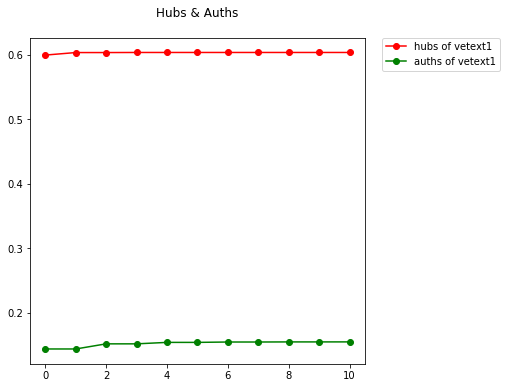

Time taken:  0.13959741592407227 seconds.


In [6]:
"""
Title: HIT algo
contributed by <`williamchangTW`>
"""
import numpy as np
from scipy.linalg import norm
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt
import time
start = time.time()
# Input to HITS algorithm is consistency matrix where entry (i,j) indicates edge from i->j
# Consistency Matrix PhiMat is assumed to be a sparse matrix in CSC format
# include file path
adj_list_path='hw3dataset/graph_2_mf.txt'

#determine the size of adj
def File_max(path):
    A=list()
    fp = open(path, "r")
    for line in iter(fp):
        line1=line.strip().split(",")
        for i in range(len(line1)):
            if int(line1[i]) not in A:
                A.append( int(line1[i]) )      
    fp.close()
    return max(A)

#change txt file to adjacency matrix
#if i,j exist A[i-1][j-1]=1

def FiletoAD(path):
    size=File_max(path)
    A=np.zeros((size,size))
    fp = open(path, "r")
    for line in iter(fp):
        line1=line.strip().split(",")
        A[int(line1[0])-1][int(line1[1])-1]=1
    fp.close()
    return A
    
MM=FiletoAD(adj_list_path)
print(MM)

#change matrix to sparse matrix representation
PhiMat = csc_matrix(MM)
print(PhiMat)
print(PhiMat.transpose())
hubs=[]
auths=[]
def HITS_coherence(MM):

    if (MM.sum()==0):
        return np.array([0])

    # Converting dense matrix to sparse matrix
    PhiMat = MM
    # epsilon is the tolerance between the successive vectors of hubs andauthorities
    epsilon = 0.0001

    # auth is a vector of authority score of dimension Mx1
    # hub is a vector of hub score of dimension Mx1
    M, N = PhiMat.shape

    # Normalizing the authorities and hubs vector by their L2 norm
    auth0 = np.ones([M, 1])
    hubs0 = np.ones([M, 1])
    print(auth0,hubs0)
   
    auth1=np.dot(PhiMat.transpose(), hubs0)
    hubs1=np.dot(PhiMat, auth1)

    hubs1 = (1.0/norm(hubs1, 2))*hubs1
    auth1 = (1.0/norm(auth1, 2))*auth1
    print ('a',auth1)
    print ('b',hubs1)
    iteration = 0
    
    # Calculating the hub and authority vectors until convergence
    while((norm (auth1-auth0, 2)+(norm(hubs1-hubs0, 2))) > epsilon):
        iteration += 1
        print('value%s:%.6f'%(iteration , norm (auth1-auth0, 2)+(norm(hubs1-hubs0, 2))))
        #print "iteration is ", iteration
        auth0 = auth1
        hubs0 = hubs1
        auth1=np.dot(PhiMat.transpose(), hubs0) #at=A.t h(t-1)
        hubs1=np.dot(PhiMat, auth0 )#ht=A a(t-1)

        #normalization
        hubs1 = hubs1/np.linalg.norm(hubs1)
        auth1 = auth1/np.linalg.norm(auth1)

        #append to list for show
        hubs.append(hubs1[1][0])
        auths.append(auth1[1][0])
        print("iter: %s"%iteration)
        print ('hubs1:',hubs1.transpose())
        print ('auth1:',auth1.transpose())
        print('--')

k=HITS_coherence(MM)

#plt show
plt.figure()
plt.figure(figsize=[6,6])
plt.title("Hubs & Auths\n")
plt.plot(hubs,'-ro',label='hubs of vetext1')
plt.plot(auths,'-go',label='auths of vetext1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()
end = time.time()
elapsed = end - start
print("Time taken: ", elapsed, "seconds.")